In [1]:
import os
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import mdtraj as md

In [3]:
nreps = [2, 4, 8, 16]
t0 = 300
tmax = 1000

In [4]:
# Temperature ladder with shared minimum and maximum temperatures
ti = []
lmbd = []
for i,nrep in enumerate(nreps):
    exponent = [i/(nrep - 1) for i in range(nrep)]
    ti.append([t0*(tmax/t0)**e for e in exponent])
    lmbd.append([t0/t for t in ti[-1]])

In [4]:
# Temperature ladder with shared $\Delta T$ between replicas
ti = []
lmbd = []
for i,nrep in enumerate(nreps):
    exponent = [j/(16 - 1) for j in range(nrep)]
    ti.append([t0*(tmax/t0)**e for e in exponent])
    lmbd.append([t0/t for t in ti[i]])

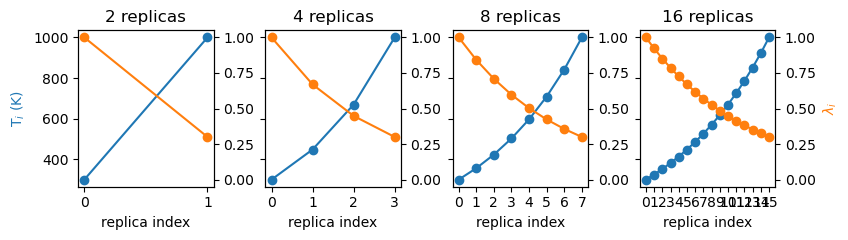

In [5]:
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab10.colors)

fig, ax = plt.subplots(1,4,figsize=(8.5,2.5), sharey=True)
for i,nrep in enumerate(nreps):
    ax[i].plot(range(nrep), ti[i], 'o-')
    ax[i].set_xticks(range(nrep))
    axt = ax[i].twinx()
    axt.plot(range(nrep), lmbd[i], 'o-', color='C1')
    axt.set_ylim(-0.05,1.05)
    ax[i].set_title('%i replicas'%nrep)
axt.set_ylabel('$\lambda_i$', color='C1')
ax[0].set_ylabel('T$_{i}$ (K)', color='C0')
[ax[i].set_xlabel('replica index') for i in range(4)]
plt.tight_layout()

In [6]:
!for n in 2 4 8 16; do perl /home/david/anaconda3/envs/plumed-mpi/bin/demux.pl "nrep${n}/rep0/md.log"; mv "replica_temp.xvg" "nrep${n}"; mv "replica_index.xvg" "nrep${n}"; done

-----------------------------------------------------------------
Going to read a file containing the exchange information from
your mdrun log file (nrep2/rep0/md.log).
This will produce a file (replica_index.xvg) suitable for
demultiplexing your trajectories using trjcat,
as well as a replica temperature file (replica_temp.xvg).
Each entry in the log file will be copied 0 times.
-----------------------------------------------------------------
There are 2 replicas.
Finished writing replica_index.xvg and replica_temp.xvg with 1000 lines
-----------------------------------------------------------------
Going to read a file containing the exchange information from
your mdrun log file (nrep4/rep0/md.log).
This will produce a file (replica_index.xvg) suitable for
demultiplexing your trajectories using trjcat,
as well as a replica temperature file (replica_temp.xvg).
Each entry in the log file will be copied 0 times.
-----------------------------------------------------------------
There ar

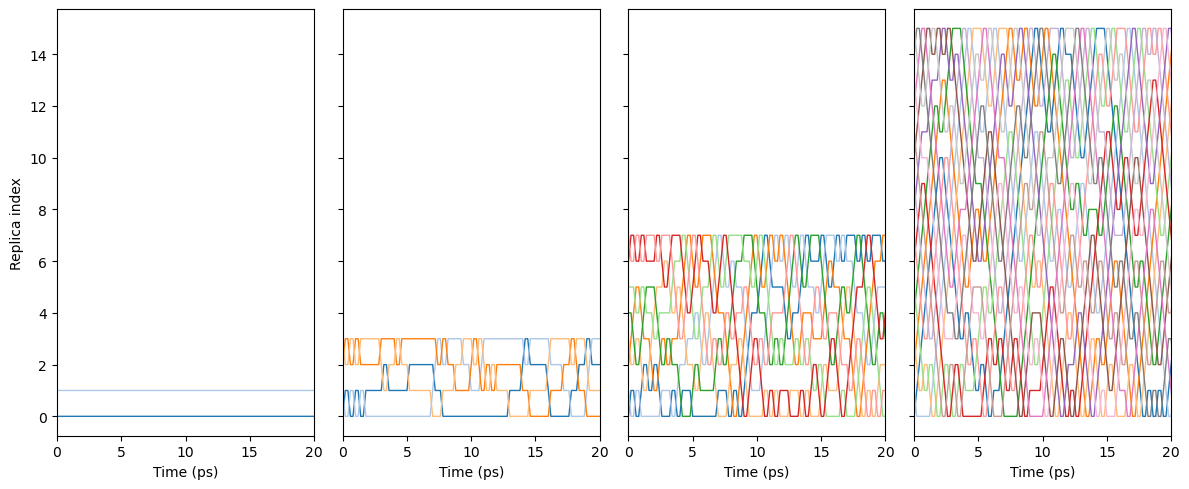

In [8]:
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab20.colors)

fig, ax = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(12, 5))
for i,nrep in enumerate(nreps):
    repl = np.loadtxt("nrep%i/replica_temp.xvg"%nrep)
    for j in range(nrep):
        ax[i].plot(repl[:,0], repl[:,j+1], '-', lw=1, color='C%i'%j)
ax[-1].set_xlim(0,20)
[ax[i].set_xlabel('Time (ps)') for i in range(4)]
ax[0].set_ylabel('Replica index')
plt.tight_layout()

In [18]:
for nrep in nreps:
    for i in range(nrep):
        command = "gmx_mpi energy -f nrep%i/rep%i/ener.edr -o nrep%i/rep%i/potential <<EOF\n10\nEOF"%(nrep,i,nrep,i)
        os.system(command)

hwloc/linux: Ignoring PCI device with non-16bit domain.
Pass --enable-32bits-pci-domain to configure to support such devices
(warning: it would break the library ABI, don't enable unless really needed).
                      :-) GROMACS - gmx energy, 2023.2 (-:

Executable:   /usr/local/gromacs/2023.2/bin/gmx_mpi
Data prefix:  /usr/local/gromacs/2023.2
Working dir:  /home/david/Research/Projects/Simulation/PLUMED/REST2/test_replicas
Command line:
  gmx_mpi energy -f nrep2/rep0/ener.edr -o nrep2/rep0/potential

Opened nrep2/rep0/ener.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  Angle            3  Proper-Dih.      4  Improper-Dih. 
  5  LJ-14            6  Coulomb-14       7  LJ-(SR)          8  Coulomb-(SR)  
  9  Coul.-recip.    10  P


Statistics over 100001 steps [ 0.0000 through 200.0000 ps ], 1 data sets
All statistics are over 1001 points (frames)

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Potential                  -26648.9         10    156.941   -38.5624  (kJ/mol)

Statistics over 100001 steps [ 0.0000 through 200.0000 ps ], 1 data sets
All statistics are over 1001 points (frames)

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Potential                  -26631.6        7.6     149.76   -51.1046  (kJ/mol)

Statistics over 100001 steps [ 0.0000 through 200.0000 ps ], 1 data sets
All statistics are over 1001 points (frames)

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Potential                  -26660.7

Last energy frame read 1000 time  200.000         

GROMACS reminds you: "XML is not a language in the sense of a programming language any more than sketches on a napkin are a language." (Charles Simonyi)

hwloc/linux: Ignoring PCI device with non-16bit domain.
Pass --enable-32bits-pci-domain to configure to support such devices
(warning: it would break the library ABI, don't enable unless really needed).
                      :-) GROMACS - gmx energy, 2023.2 (-:

Executable:   /usr/local/gromacs/2023.2/bin/gmx_mpi
Data prefix:  /usr/local/gromacs/2023.2
Working dir:  /home/david/Research/Projects/Simulation/PLUMED/REST2/test_replicas
Command line:
  gmx_mpi energy -f nrep8/rep2/ener.edr -o nrep8/rep2/potential

Opened nrep8/rep2/ener.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
------------------------------------------------


Statistics over 100001 steps [ 0.0000 through 200.0000 ps ], 1 data sets
All statistics are over 1001 points (frames)

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Potential                    -26607        5.3    151.336    2.70819  (kJ/mol)

Statistics over 100001 steps [ 0.0000 through 200.0000 ps ], 1 data sets
All statistics are over 1001 points (frames)

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Potential                  -26585.8        6.8    147.119    -25.739  (kJ/mol)

Statistics over 100001 steps [ 0.0000 through 200.0000 ps ], 1 data sets
All statistics are over 1001 points (frames)

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Potential                  -26565.1

hwloc/linux: Ignoring PCI device with non-16bit domain.
Pass --enable-32bits-pci-domain to configure to support such devices
(warning: it would break the library ABI, don't enable unless really needed).
                      :-) GROMACS - gmx energy, 2023.2 (-:

Executable:   /usr/local/gromacs/2023.2/bin/gmx_mpi
Data prefix:  /usr/local/gromacs/2023.2
Working dir:  /home/david/Research/Projects/Simulation/PLUMED/REST2/test_replicas
Command line:
  gmx_mpi energy -f nrep16/rep1/ener.edr -o nrep16/rep1/potential

Opened nrep16/rep1/ener.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  Angle            3  Proper-Dih.      4  Improper-Dih. 
  5  LJ-14            6  Coulomb-14       7  LJ-(SR)          8  Coulomb-(SR)  
  9  Coul.-recip.    10


Statistics over 100001 steps [ 0.0000 through 200.0000 ps ], 1 data sets
All statistics are over 1001 points (frames)

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Potential                  -26608.5        7.3    143.663    17.7552  (kJ/mol)

Statistics over 100001 steps [ 0.0000 through 200.0000 ps ], 1 data sets
All statistics are over 1001 points (frames)

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Potential                    -26585        8.2     147.86      14.74  (kJ/mol)

Statistics over 100001 steps [ 0.0000 through 200.0000 ps ], 1 data sets
All statistics are over 1001 points (frames)

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Potential                  -26569.1

                      :-) GROMACS - gmx energy, 2023.2 (-:

Executable:   /usr/local/gromacs/2023.2/bin/gmx_mpi
Data prefix:  /usr/local/gromacs/2023.2
Working dir:  /home/david/Research/Projects/Simulation/PLUMED/REST2/test_replicas
Command line:
  gmx_mpi energy -f nrep16/rep7/ener.edr -o nrep16/rep7/potential

Opened nrep16/rep7/ener.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  Angle            3  Proper-Dih.      4  Improper-Dih. 
  5  LJ-14            6  Coulomb-14       7  LJ-(SR)          8  Coulomb-(SR)  
  9  Coul.-recip.    10  Potential       11  Kinetic-En.     12  Total-Energy  
 13  Temperature     14  Pressure        15  Constr.-rmsd    16  Vir-XX        
 17  Vir-XY          18  Vir-XZ          19  Vir-YX          20  V


Statistics over 100001 steps [ 0.0000 through 200.0000 ps ], 1 data sets
All statistics are over 1001 points (frames)

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Potential                    -26502        8.3    153.907    15.9141  (kJ/mol)

Statistics over 100001 steps [ 0.0000 through 200.0000 ps ], 1 data sets
All statistics are over 1001 points (frames)

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Potential                  -26485.1        4.8    150.191    15.8721  (kJ/mol)

Statistics over 100001 steps [ 0.0000 through 200.0000 ps ], 1 data sets
All statistics are over 1001 points (frames)

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Potential                    -26475

hwloc/linux: Ignoring PCI device with non-16bit domain.
Pass --enable-32bits-pci-domain to configure to support such devices
(warning: it would break the library ABI, don't enable unless really needed).
                      :-) GROMACS - gmx energy, 2023.2 (-:

Executable:   /usr/local/gromacs/2023.2/bin/gmx_mpi
Data prefix:  /usr/local/gromacs/2023.2
Working dir:  /home/david/Research/Projects/Simulation/PLUMED/REST2/test_replicas
Command line:
  gmx_mpi energy -f nrep16/rep14/ener.edr -o nrep16/rep14/potential

Opened nrep16/rep14/ener.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  Angle            3  Proper-Dih.      4  Improper-Dih. 
  5  LJ-14            6  Coulomb-14       7  LJ-(SR)          8  Coulomb-(SR)  
  9  Coul.-recip.   

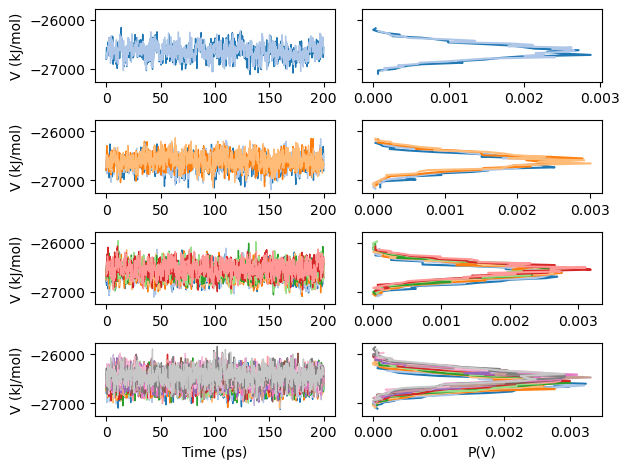

In [20]:
aver = []
fig, ax = plt.subplots(4,2, sharey=True)
nbins = 30
for i, nrep in enumerate(nreps):
    for j in range(nrep):
        file = "nrep%i/rep%i/potential.xvg"%(nrep,j)
        data = np.loadtxt(file, comments=["#", "@"])
        ax[i][0].plot(data[:,0], data[:,1], lw=1, label='$\lambda=$%g'%lmbd[i][j])
        aver.append(np.mean(data[:,1]))
        
        hist, edges = np.histogram(data[20:,1], bins=nbins, density=True)
        centers = [np.mean(edges[i:i+2]) for i in range(nbins)]
        ax[i][1].plot(hist, centers)

[ax[i][0].set_ylabel('V (kJ/mol)') for i in range(4)]
ax[-1,0].set_xlabel('Time (ps)')
ax[-1,1].set_xlabel('P(V)')
plt.tight_layout()


In [25]:
gmx = "/home/david/anaconda3/envs/plumed-mpi/bin/gmx_mpi"
mdp = "../sd_nvt_rerun.mdp"
gro = "../alaTB_ff03_tip3p_npt.gro"

for i, nrep in enumerate(nreps):
    for j in range(nrep):
        folder = "nrep%i/rep%i"%(nrep,j)
        top = "%s/scaled.top"%folder
        tpr = "%s/alaTB_ff03_tip3p_nvt_rerun.tpr"%folder
        command = gmx + " grompp -f %s -p %s -c %s -o %s"%(mdp, top, gro, tpr)
        os.system(command)
        
        tpr = "%s/alaTB_ff03_tip3p_nvt_rerun.tpr"%folder
        xtc = "%s/traj_comp.xtc"%folder
        edr = "%s/ener_rerun.edr"%folder
        log = "%s/md_rerun.log"%folder
        command = "%s mdrun -s %s -nsteps 100000 -ntomp 1 -rerun %s -e %s -o %s"%(gmx, tpr, xtc, edr, log)
        print (command)
        os.system(command)

                      :-) GROMACS - gmx grompp, 2019.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Be

turning H bonds into constraints...
turning H bonds into constraints...
Analysing residue names:
There are:     3    Protein residues
There are:   667      Water residues
Analysing Protein...
Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K
Calculated rlist for 1x1 atom pair-list as 1.035 nm, buffer size 0.035 nm
Set rlist, assuming 4x4 atom pair-list, to 1.000 nm, buffer size 0.000 nm
Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 24x24x24, spacing 0.114 0.114 0.114
This run will generate roughly 607 Mb of data
/home/david/anaconda3/envs/plumed-mpi/bin/gmx_mpi mdrun -s nrep2/rep0/alaTB_ff03_tip3p_nvt_rerun.tpr -nsteps 100000 -ntomp 1 -rerun nrep2/rep0/traj_comp.xtc -e nrep2/rep0/ener_rerun.edr



Back Off! I just backed up nrep2/rep0/ener_rerun.edr to nrep2/rep0/#ener_rerun.edr.1#
starting md rerun 'Green Red Orange Magenta Azure Cyan Skyblue in water', reading coordinates from input trajectory 'nrep2/rep0/traj_comp.xtc'

Last frame       1000 time  200.000   

NOTE: 50 % of the run time was spent in pair search,
      you might want to increase nstlist (this has no effect on accuracy)

               Core t (s)   Wall t (s)        (%)
       Time:        4.017        4.017      100.0
                 (ns/day)    (hour/ns)
Performance:     4301.931        0.006

GROMACS reminds you: "Making merry out of nothing, like in refugee camp" (Gogol Bordello)

                      :-) GROMACS - gmx grompp, 2019.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       A

turning H bonds into constraints...
turning H bonds into constraints...
Analysing residue names:
There are:     3    Protein residues
There are:   667      Water residues
Analysing Protein...
Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K
Calculated rlist for 1x1 atom pair-list as 1.035 nm, buffer size 0.035 nm
Set rlist, assuming 4x4 atom pair-list, to 1.000 nm, buffer size 0.000 nm
Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 24x24x24, spacing 0.114 0.114 0.114
This run will generate roughly 607 Mb of data
/home/david/anaconda3/envs/plumed-mpi/bin/gmx_mpi mdrun -s nrep2/rep1/alaTB_ff03_tip3p_nvt_rerun.tpr -nsteps 100000 -ntomp 1 -rerun nrep2/rep1/traj_comp.xtc -e nrep2/rep1/ener_rerun.edr


                      :-) GROMACS - gmx mdrun, 2019.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Ber

turning H bonds into constraints...
turning H bonds into constraints...
Analysing residue names:
There are:     3    Protein residues
There are:   667      Water residues
Analysing Protein...
Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K
Calculated rlist for 1x1 atom pair-list as 1.035 nm, buffer size 0.035 nm
Set rlist, assuming 4x4 atom pair-list, to 1.000 nm, buffer size 0.000 nm
Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 24x24x24, spacing 0.114 0.114 0.114
This run will generate roughly 607 Mb of data
/home/david/anaconda3/envs/plumed-mpi/bin/gmx_mpi mdrun -s nrep4/rep0/alaTB_ff03_tip3p_nvt_rerun.tpr -nsteps 100000 -ntomp 1 -rerun nrep4/rep0/traj_comp.xtc -e nrep4/rep0/ener_rerun.edr


                      :-) GROMACS - gmx mdrun, 2019.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Ber

turning H bonds into constraints...
turning H bonds into constraints...
Analysing residue names:
There are:     3    Protein residues
There are:   667      Water residues
Analysing Protein...
Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K
Calculated rlist for 1x1 atom pair-list as 1.035 nm, buffer size 0.035 nm
Set rlist, assuming 4x4 atom pair-list, to 1.000 nm, buffer size 0.000 nm
Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 24x24x24, spacing 0.114 0.114 0.114
This run will generate roughly 607 Mb of data
/home/david/anaconda3/envs/plumed-mpi/bin/gmx_mpi mdrun -s nrep4/rep1/alaTB_ff03_tip3p_nvt_rerun.tpr -nsteps 100000 -ntomp 1 -rerun nrep4/rep1/traj_comp.xtc -e nrep4/rep1/ener_rerun.edr


                      :-) GROMACS - gmx mdrun, 2019.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Ber

turning H bonds into constraints...
turning H bonds into constraints...
Analysing residue names:
There are:     3    Protein residues
There are:   667      Water residues
Analysing Protein...
Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K
Calculated rlist for 1x1 atom pair-list as 1.035 nm, buffer size 0.035 nm
Set rlist, assuming 4x4 atom pair-list, to 1.000 nm, buffer size 0.000 nm
Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 24x24x24, spacing 0.114 0.114 0.114
This run will generate roughly 607 Mb of data
/home/david/anaconda3/envs/plumed-mpi/bin/gmx_mpi mdrun -s nrep4/rep2/alaTB_ff03_tip3p_nvt_rerun.tpr -nsteps 100000 -ntomp 1 -rerun nrep4/rep2/traj_comp.xtc -e nrep4/rep2/ener_rerun.edr


                      :-) GROMACS - gmx mdrun, 2019.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Ber

turning H bonds into constraints...
turning H bonds into constraints...
Analysing residue names:
There are:     3    Protein residues
There are:   667      Water residues
Analysing Protein...
Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K
Calculated rlist for 1x1 atom pair-list as 1.035 nm, buffer size 0.035 nm
Set rlist, assuming 4x4 atom pair-list, to 1.000 nm, buffer size 0.000 nm
Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 24x24x24, spacing 0.114 0.114 0.114
This run will generate roughly 607 Mb of data
/home/david/anaconda3/envs/plumed-mpi/bin/gmx_mpi mdrun -s nrep4/rep3/alaTB_ff03_tip3p_nvt_rerun.tpr -nsteps 100000 -ntomp 1 -rerun nrep4/rep3/traj_comp.xtc -e nrep4/rep3/ener_rerun.edr


                      :-) GROMACS - gmx mdrun, 2019.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Ber

turning H bonds into constraints...
turning H bonds into constraints...
Analysing residue names:
There are:     3    Protein residues
There are:   667      Water residues
Analysing Protein...
Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K
Calculated rlist for 1x1 atom pair-list as 1.035 nm, buffer size 0.035 nm
Set rlist, assuming 4x4 atom pair-list, to 1.000 nm, buffer size 0.000 nm
Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 24x24x24, spacing 0.114 0.114 0.114
This run will generate roughly 607 Mb of data
/home/david/anaconda3/envs/plumed-mpi/bin/gmx_mpi mdrun -s nrep8/rep0/alaTB_ff03_tip3p_nvt_rerun.tpr -nsteps 100000 -ntomp 1 -rerun nrep8/rep0/traj_comp.xtc -e nrep8/rep0/ener_rerun.edr


                      :-) GROMACS - gmx mdrun, 2019.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Ber

turning H bonds into constraints...
turning H bonds into constraints...
Analysing residue names:
There are:     3    Protein residues
There are:   667      Water residues
Analysing Protein...
Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K
Calculated rlist for 1x1 atom pair-list as 1.035 nm, buffer size 0.035 nm
Set rlist, assuming 4x4 atom pair-list, to 1.000 nm, buffer size 0.000 nm
Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 24x24x24, spacing 0.114 0.114 0.114
This run will generate roughly 607 Mb of data
/home/david/anaconda3/envs/plumed-mpi/bin/gmx_mpi mdrun -s nrep8/rep1/alaTB_ff03_tip3p_nvt_rerun.tpr -nsteps 100000 -ntomp 1 -rerun nrep8/rep1/traj_comp.xtc -e nrep8/rep1/ener_rerun.edr


                      :-) GROMACS - gmx mdrun, 2019.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Ber

turning H bonds into constraints...
turning H bonds into constraints...
Analysing residue names:
There are:     3    Protein residues
There are:   667      Water residues
Analysing Protein...
Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K
Calculated rlist for 1x1 atom pair-list as 1.035 nm, buffer size 0.035 nm
Set rlist, assuming 4x4 atom pair-list, to 1.000 nm, buffer size 0.000 nm
Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 24x24x24, spacing 0.114 0.114 0.114
This run will generate roughly 607 Mb of data
/home/david/anaconda3/envs/plumed-mpi/bin/gmx_mpi mdrun -s nrep8/rep2/alaTB_ff03_tip3p_nvt_rerun.tpr -nsteps 100000 -ntomp 1 -rerun nrep8/rep2/traj_comp.xtc -e nrep8/rep2/ener_rerun.edr


                      :-) GROMACS - gmx mdrun, 2019.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Ber

turning H bonds into constraints...
turning H bonds into constraints...
Analysing residue names:
There are:     3    Protein residues
There are:   667      Water residues
Analysing Protein...
Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K
Calculated rlist for 1x1 atom pair-list as 1.035 nm, buffer size 0.035 nm
Set rlist, assuming 4x4 atom pair-list, to 1.000 nm, buffer size 0.000 nm
Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 24x24x24, spacing 0.114 0.114 0.114
This run will generate roughly 607 Mb of data
/home/david/anaconda3/envs/plumed-mpi/bin/gmx_mpi mdrun -s nrep8/rep3/alaTB_ff03_tip3p_nvt_rerun.tpr -nsteps 100000 -ntomp 1 -rerun nrep8/rep3/traj_comp.xtc -e nrep8/rep3/ener_rerun.edr


                      :-) GROMACS - gmx mdrun, 2019.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Ber

turning H bonds into constraints...
turning H bonds into constraints...
Analysing residue names:
There are:     3    Protein residues
There are:   667      Water residues
Analysing Protein...
Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K
Calculated rlist for 1x1 atom pair-list as 1.035 nm, buffer size 0.035 nm
Set rlist, assuming 4x4 atom pair-list, to 1.000 nm, buffer size 0.000 nm
Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 24x24x24, spacing 0.114 0.114 0.114
This run will generate roughly 607 Mb of data
/home/david/anaconda3/envs/plumed-mpi/bin/gmx_mpi mdrun -s nrep8/rep4/alaTB_ff03_tip3p_nvt_rerun.tpr -nsteps 100000 -ntomp 1 -rerun nrep8/rep4/traj_comp.xtc -e nrep8/rep4/ener_rerun.edr


                      :-) GROMACS - gmx mdrun, 2019.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Ber

turning H bonds into constraints...
turning H bonds into constraints...
Analysing residue names:
There are:     3    Protein residues
There are:   667      Water residues
Analysing Protein...
Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K
Calculated rlist for 1x1 atom pair-list as 1.035 nm, buffer size 0.035 nm
Set rlist, assuming 4x4 atom pair-list, to 1.000 nm, buffer size 0.000 nm
Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 24x24x24, spacing 0.114 0.114 0.114
This run will generate roughly 607 Mb of data
/home/david/anaconda3/envs/plumed-mpi/bin/gmx_mpi mdrun -s nrep8/rep5/alaTB_ff03_tip3p_nvt_rerun.tpr -nsteps 100000 -ntomp 1 -rerun nrep8/rep5/traj_comp.xtc -e nrep8/rep5/ener_rerun.edr


                      :-) GROMACS - gmx mdrun, 2019.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Ber

turning H bonds into constraints...
turning H bonds into constraints...
Analysing residue names:
There are:     3    Protein residues
There are:   667      Water residues
Analysing Protein...
Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K
Calculated rlist for 1x1 atom pair-list as 1.035 nm, buffer size 0.035 nm
Set rlist, assuming 4x4 atom pair-list, to 1.000 nm, buffer size 0.000 nm
Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 24x24x24, spacing 0.114 0.114 0.114
This run will generate roughly 607 Mb of data
/home/david/anaconda3/envs/plumed-mpi/bin/gmx_mpi mdrun -s nrep8/rep6/alaTB_ff03_tip3p_nvt_rerun.tpr -nsteps 100000 -ntomp 1 -rerun nrep8/rep6/traj_comp.xtc -e nrep8/rep6/ener_rerun.edr


                      :-) GROMACS - gmx mdrun, 2019.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Ber

turning H bonds into constraints...
turning H bonds into constraints...
Analysing residue names:
There are:     3    Protein residues
There are:   667      Water residues
Analysing Protein...
Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K
Calculated rlist for 1x1 atom pair-list as 1.035 nm, buffer size 0.035 nm
Set rlist, assuming 4x4 atom pair-list, to 1.000 nm, buffer size 0.000 nm
Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 24x24x24, spacing 0.114 0.114 0.114
This run will generate roughly 607 Mb of data
/home/david/anaconda3/envs/plumed-mpi/bin/gmx_mpi mdrun -s nrep8/rep7/alaTB_ff03_tip3p_nvt_rerun.tpr -nsteps 100000 -ntomp 1 -rerun nrep8/rep7/traj_comp.xtc -e nrep8/rep7/ener_rerun.edr


                      :-) GROMACS - gmx mdrun, 2019.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Ber

turning H bonds into constraints...
turning H bonds into constraints...
Analysing residue names:
There are:     3    Protein residues
There are:   667      Water residues
Analysing Protein...
Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K
Calculated rlist for 1x1 atom pair-list as 1.035 nm, buffer size 0.035 nm
Set rlist, assuming 4x4 atom pair-list, to 1.000 nm, buffer size 0.000 nm
Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 24x24x24, spacing 0.114 0.114 0.114
This run will generate roughly 607 Mb of data
/home/david/anaconda3/envs/plumed-mpi/bin/gmx_mpi mdrun -s nrep16/rep0/alaTB_ff03_tip3p_nvt_rerun.tpr -nsteps 100000 -ntomp 1 -rerun nrep16/rep0/traj_comp.xtc -e nrep16/rep0/ener_rerun.edr


                      :-) GROMACS - gmx mdrun, 2019.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Ber

turning H bonds into constraints...
turning H bonds into constraints...
Analysing residue names:
There are:     3    Protein residues
There are:   667      Water residues
Analysing Protein...
Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K
Calculated rlist for 1x1 atom pair-list as 1.035 nm, buffer size 0.035 nm
Set rlist, assuming 4x4 atom pair-list, to 1.000 nm, buffer size 0.000 nm
Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 24x24x24, spacing 0.114 0.114 0.114
This run will generate roughly 607 Mb of data
/home/david/anaconda3/envs/plumed-mpi/bin/gmx_mpi mdrun -s nrep16/rep1/alaTB_ff03_tip3p_nvt_rerun.tpr -nsteps 100000 -ntomp 1 -rerun nrep16/rep1/traj_comp.xtc -e nrep16/rep1/ener_rerun.edr


                      :-) GROMACS - gmx mdrun, 2019.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Ber

turning H bonds into constraints...
turning H bonds into constraints...
Analysing residue names:
There are:     3    Protein residues
There are:   667      Water residues
Analysing Protein...
Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K
Calculated rlist for 1x1 atom pair-list as 1.035 nm, buffer size 0.035 nm
Set rlist, assuming 4x4 atom pair-list, to 1.000 nm, buffer size 0.000 nm
Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 24x24x24, spacing 0.114 0.114 0.114
This run will generate roughly 607 Mb of data
/home/david/anaconda3/envs/plumed-mpi/bin/gmx_mpi mdrun -s nrep16/rep2/alaTB_ff03_tip3p_nvt_rerun.tpr -nsteps 100000 -ntomp 1 -rerun nrep16/rep2/traj_comp.xtc -e nrep16/rep2/ener_rerun.edr


                      :-) GROMACS - gmx mdrun, 2019.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Ber

turning H bonds into constraints...
turning H bonds into constraints...
Analysing residue names:
There are:     3    Protein residues
There are:   667      Water residues
Analysing Protein...
Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K
Calculated rlist for 1x1 atom pair-list as 1.035 nm, buffer size 0.035 nm
Set rlist, assuming 4x4 atom pair-list, to 1.000 nm, buffer size 0.000 nm
Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 24x24x24, spacing 0.114 0.114 0.114
This run will generate roughly 607 Mb of data
/home/david/anaconda3/envs/plumed-mpi/bin/gmx_mpi mdrun -s nrep16/rep3/alaTB_ff03_tip3p_nvt_rerun.tpr -nsteps 100000 -ntomp 1 -rerun nrep16/rep3/traj_comp.xtc -e nrep16/rep3/ener_rerun.edr


                      :-) GROMACS - gmx mdrun, 2019.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Ber

turning H bonds into constraints...
turning H bonds into constraints...
Analysing residue names:
There are:     3    Protein residues
There are:   667      Water residues
Analysing Protein...
Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K
Calculated rlist for 1x1 atom pair-list as 1.035 nm, buffer size 0.035 nm
Set rlist, assuming 4x4 atom pair-list, to 1.000 nm, buffer size 0.000 nm
Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 24x24x24, spacing 0.114 0.114 0.114
This run will generate roughly 607 Mb of data
/home/david/anaconda3/envs/plumed-mpi/bin/gmx_mpi mdrun -s nrep16/rep4/alaTB_ff03_tip3p_nvt_rerun.tpr -nsteps 100000 -ntomp 1 -rerun nrep16/rep4/traj_comp.xtc -e nrep16/rep4/ener_rerun.edr


                      :-) GROMACS - gmx mdrun, 2019.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Ber

turning H bonds into constraints...
turning H bonds into constraints...
Analysing residue names:
There are:     3    Protein residues
There are:   667      Water residues
Analysing Protein...
Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K
Calculated rlist for 1x1 atom pair-list as 1.035 nm, buffer size 0.035 nm
Set rlist, assuming 4x4 atom pair-list, to 1.000 nm, buffer size 0.000 nm
Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 24x24x24, spacing 0.114 0.114 0.114
This run will generate roughly 607 Mb of data
/home/david/anaconda3/envs/plumed-mpi/bin/gmx_mpi mdrun -s nrep16/rep5/alaTB_ff03_tip3p_nvt_rerun.tpr -nsteps 100000 -ntomp 1 -rerun nrep16/rep5/traj_comp.xtc -e nrep16/rep5/ener_rerun.edr


                      :-) GROMACS - gmx mdrun, 2019.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Ber

turning H bonds into constraints...
turning H bonds into constraints...
Analysing residue names:
There are:     3    Protein residues
There are:   667      Water residues
Analysing Protein...
Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K
Calculated rlist for 1x1 atom pair-list as 1.035 nm, buffer size 0.035 nm
Set rlist, assuming 4x4 atom pair-list, to 1.000 nm, buffer size 0.000 nm
Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 24x24x24, spacing 0.114 0.114 0.114
This run will generate roughly 607 Mb of data
/home/david/anaconda3/envs/plumed-mpi/bin/gmx_mpi mdrun -s nrep16/rep6/alaTB_ff03_tip3p_nvt_rerun.tpr -nsteps 100000 -ntomp 1 -rerun nrep16/rep6/traj_comp.xtc -e nrep16/rep6/ener_rerun.edr


                      :-) GROMACS - gmx mdrun, 2019.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Ber

turning H bonds into constraints...
turning H bonds into constraints...
Analysing residue names:
There are:     3    Protein residues
There are:   667      Water residues
Analysing Protein...
Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K
Calculated rlist for 1x1 atom pair-list as 1.035 nm, buffer size 0.035 nm
Set rlist, assuming 4x4 atom pair-list, to 1.000 nm, buffer size 0.000 nm
Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 24x24x24, spacing 0.114 0.114 0.114
This run will generate roughly 607 Mb of data
/home/david/anaconda3/envs/plumed-mpi/bin/gmx_mpi mdrun -s nrep16/rep7/alaTB_ff03_tip3p_nvt_rerun.tpr -nsteps 100000 -ntomp 1 -rerun nrep16/rep7/traj_comp.xtc -e nrep16/rep7/ener_rerun.edr


                      :-) GROMACS - gmx mdrun, 2019.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Ber

turning H bonds into constraints...
turning H bonds into constraints...
Analysing residue names:
There are:     3    Protein residues
There are:   667      Water residues
Analysing Protein...
Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K
Calculated rlist for 1x1 atom pair-list as 1.035 nm, buffer size 0.035 nm
Set rlist, assuming 4x4 atom pair-list, to 1.000 nm, buffer size 0.000 nm
Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 24x24x24, spacing 0.114 0.114 0.114
This run will generate roughly 607 Mb of data
/home/david/anaconda3/envs/plumed-mpi/bin/gmx_mpi mdrun -s nrep16/rep8/alaTB_ff03_tip3p_nvt_rerun.tpr -nsteps 100000 -ntomp 1 -rerun nrep16/rep8/traj_comp.xtc -e nrep16/rep8/ener_rerun.edr


                      :-) GROMACS - gmx mdrun, 2019.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Ber

turning H bonds into constraints...
turning H bonds into constraints...
Analysing residue names:
There are:     3    Protein residues
There are:   667      Water residues
Analysing Protein...
Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K
Calculated rlist for 1x1 atom pair-list as 1.035 nm, buffer size 0.035 nm
Set rlist, assuming 4x4 atom pair-list, to 1.000 nm, buffer size 0.000 nm
Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 24x24x24, spacing 0.114 0.114 0.114
This run will generate roughly 607 Mb of data
/home/david/anaconda3/envs/plumed-mpi/bin/gmx_mpi mdrun -s nrep16/rep9/alaTB_ff03_tip3p_nvt_rerun.tpr -nsteps 100000 -ntomp 1 -rerun nrep16/rep9/traj_comp.xtc -e nrep16/rep9/ener_rerun.edr


                      :-) GROMACS - gmx mdrun, 2019.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Ber

turning H bonds into constraints...
turning H bonds into constraints...
Analysing residue names:
There are:     3    Protein residues
There are:   667      Water residues
Analysing Protein...
Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K
Calculated rlist for 1x1 atom pair-list as 1.035 nm, buffer size 0.035 nm
Set rlist, assuming 4x4 atom pair-list, to 1.000 nm, buffer size 0.000 nm
Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 24x24x24, spacing 0.114 0.114 0.114
This run will generate roughly 607 Mb of data
/home/david/anaconda3/envs/plumed-mpi/bin/gmx_mpi mdrun -s nrep16/rep10/alaTB_ff03_tip3p_nvt_rerun.tpr -nsteps 100000 -ntomp 1 -rerun nrep16/rep10/traj_comp.xtc -e nrep16/rep10/ener_rerun.edr


                      :-) GROMACS - gmx mdrun, 2019.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Ber

turning H bonds into constraints...
turning H bonds into constraints...
Analysing residue names:
There are:     3    Protein residues
There are:   667      Water residues
Analysing Protein...
Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K
Calculated rlist for 1x1 atom pair-list as 1.035 nm, buffer size 0.035 nm
Set rlist, assuming 4x4 atom pair-list, to 1.000 nm, buffer size 0.000 nm
Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 24x24x24, spacing 0.114 0.114 0.114
This run will generate roughly 607 Mb of data
/home/david/anaconda3/envs/plumed-mpi/bin/gmx_mpi mdrun -s nrep16/rep11/alaTB_ff03_tip3p_nvt_rerun.tpr -nsteps 100000 -ntomp 1 -rerun nrep16/rep11/traj_comp.xtc -e nrep16/rep11/ener_rerun.edr


                      :-) GROMACS - gmx mdrun, 2019.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Ber

turning H bonds into constraints...
turning H bonds into constraints...
Analysing residue names:
There are:     3    Protein residues
There are:   667      Water residues
Analysing Protein...
Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K
Calculated rlist for 1x1 atom pair-list as 1.035 nm, buffer size 0.035 nm
Set rlist, assuming 4x4 atom pair-list, to 1.000 nm, buffer size 0.000 nm
Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 24x24x24, spacing 0.114 0.114 0.114
This run will generate roughly 607 Mb of data
/home/david/anaconda3/envs/plumed-mpi/bin/gmx_mpi mdrun -s nrep16/rep12/alaTB_ff03_tip3p_nvt_rerun.tpr -nsteps 100000 -ntomp 1 -rerun nrep16/rep12/traj_comp.xtc -e nrep16/rep12/ener_rerun.edr


                      :-) GROMACS - gmx mdrun, 2019.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Ber

turning H bonds into constraints...
turning H bonds into constraints...
Analysing residue names:
There are:     3    Protein residues
There are:   667      Water residues
Analysing Protein...
Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K
Calculated rlist for 1x1 atom pair-list as 1.035 nm, buffer size 0.035 nm
Set rlist, assuming 4x4 atom pair-list, to 1.000 nm, buffer size 0.000 nm
Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 24x24x24, spacing 0.114 0.114 0.114
This run will generate roughly 607 Mb of data
/home/david/anaconda3/envs/plumed-mpi/bin/gmx_mpi mdrun -s nrep16/rep13/alaTB_ff03_tip3p_nvt_rerun.tpr -nsteps 100000 -ntomp 1 -rerun nrep16/rep13/traj_comp.xtc -e nrep16/rep13/ener_rerun.edr


                      :-) GROMACS - gmx mdrun, 2019.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Ber

turning H bonds into constraints...
turning H bonds into constraints...
Analysing residue names:
There are:     3    Protein residues
There are:   667      Water residues
Analysing Protein...
Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K
Calculated rlist for 1x1 atom pair-list as 1.035 nm, buffer size 0.035 nm
Set rlist, assuming 4x4 atom pair-list, to 1.000 nm, buffer size 0.000 nm
Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 24x24x24, spacing 0.114 0.114 0.114
This run will generate roughly 607 Mb of data
/home/david/anaconda3/envs/plumed-mpi/bin/gmx_mpi mdrun -s nrep16/rep14/alaTB_ff03_tip3p_nvt_rerun.tpr -nsteps 100000 -ntomp 1 -rerun nrep16/rep14/traj_comp.xtc -e nrep16/rep14/ener_rerun.edr


                      :-) GROMACS - gmx mdrun, 2019.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Ber

turning H bonds into constraints...
turning H bonds into constraints...
Analysing residue names:
There are:     3    Protein residues
There are:   667      Water residues
Analysing Protein...
Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K
Calculated rlist for 1x1 atom pair-list as 1.035 nm, buffer size 0.035 nm
Set rlist, assuming 4x4 atom pair-list, to 1.000 nm, buffer size 0.000 nm
Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 24x24x24, spacing 0.114 0.114 0.114
This run will generate roughly 607 Mb of data
/home/david/anaconda3/envs/plumed-mpi/bin/gmx_mpi mdrun -s nrep16/rep15/alaTB_ff03_tip3p_nvt_rerun.tpr -nsteps 100000 -ntomp 1 -rerun nrep16/rep15/traj_comp.xtc -e nrep16/rep15/ener_rerun.edr


                      :-) GROMACS - gmx mdrun, 2019.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Ber

In [26]:
for nrep in nreps:
    for i in range(nrep):
        command = "gmx_mpi energy -f nrep%i/rep%i/ener_rerun.edr -o nrep%i/rep%i/potential_rerun <<EOF\n10\n3\n11\n12\n15\n16\n19\n20\nEOF"%(nrep,i,nrep,i)
        os.system(command)

hwloc/linux: Ignoring PCI device with non-16bit domain.
Pass --enable-32bits-pci-domain to configure to support such devices
(warning: it would break the library ABI, don't enable unless really needed).
                      :-) GROMACS - gmx energy, 2023.2 (-:

Executable:   /usr/local/gromacs/2023.2/bin/gmx_mpi
Data prefix:  /usr/local/gromacs/2023.2
Working dir:  /home/david/Research/Projects/Simulation/PLUMED/REST2/test_replicas
Command line:
  gmx_mpi energy -f nrep2/rep0/ener_rerun.edr -o nrep2/rep0/potential_rerun

Opened nrep2/rep0/ener_rerun.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  Angle            3  Proper-Dih.      4  Improper-Dih. 
  5  LJ-14            6  Coulomb-14       7  LJ-(SR)          8  Coulomb-(SR)  
  9  Cou


Statistics over 100001 steps [ 0.0000 through 200.0000 ps ], 8 data sets
All statistics are over 1001 points (frames)

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Proper Dih.                 62.2645       0.26    4.65725  -0.203704  (kJ/mol)
Potential                  -26648.9         10    156.987   -38.8664  (kJ/mol)
Coul-SR:Protein-Protein    -273.719       0.74    8.46966    5.02219  (kJ/mol)
LJ-SR:Protein-Protein      -4.23229      0.043     1.5441   0.177682  (kJ/mol)
Coul-SR:Protein-SOL        -125.251          1    21.8903   -3.55416  (kJ/mol)
LJ-SR:Protein-SOL          -39.1018       0.49    10.2472    2.32493  (kJ/mol)
Coul-SR:SOL-SOL            -30710.1         12    259.255   -74.4828  (kJ/mol)
LJ-SR:SOL-SOL               4202.36        6.1    169.394    38.3884  (kJ/mol)

Statistics over 100001 steps [ 0.0000 through 200.0000 ps ], 8 data sets
All statistics are over 1

hwloc/linux: Ignoring PCI device with non-16bit domain.
Pass --enable-32bits-pci-domain to configure to support such devices
(warning: it would break the library ABI, don't enable unless really needed).
                      :-) GROMACS - gmx energy, 2023.2 (-:

Executable:   /usr/local/gromacs/2023.2/bin/gmx_mpi
Data prefix:  /usr/local/gromacs/2023.2
Working dir:  /home/david/Research/Projects/Simulation/PLUMED/REST2/test_replicas
Command line:
  gmx_mpi energy -f nrep8/rep2/ener_rerun.edr -o nrep8/rep2/potential_rerun

Opened nrep8/rep2/ener_rerun.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  Angle            3  Proper-Dih.      4  Improper-Dih. 
  5  LJ-14            6  Coulomb-14       7  LJ-(SR)          8  Coulomb-(SR)  
  9  Cou


Statistics over 100001 steps [ 0.0000 through 200.0000 ps ], 8 data sets
All statistics are over 1001 points (frames)

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Proper Dih.                 53.9576       0.16    4.31424   0.452156  (kJ/mol)
Potential                  -26607.8        5.6    151.985    3.84822  (kJ/mol)
Coul-SR:Protein-Protein    -234.478       0.26    8.08996  -0.326319  (kJ/mol)
LJ-SR:Protein-Protein       -3.4805      0.069    1.44596 -0.0228842  (kJ/mol)
Coul-SR:Protein-SOL        -107.172       0.93    19.7093      3.148  (kJ/mol)
LJ-SR:Protein-SOL          -35.8672       0.46    9.90733   -2.69003  (kJ/mol)
Coul-SR:SOL-SOL            -30738.2        7.3    247.292    9.59792  (kJ/mol)
LJ-SR:SOL-SOL               4218.56        3.7    161.487    -6.2534  (kJ/mol)

Statistics over 100001 steps [ 0.0000 through 200.0000 ps ], 8 data sets
All statistics are over 1

hwloc/linux: Ignoring PCI device with non-16bit domain.
Pass --enable-32bits-pci-domain to configure to support such devices
(warning: it would break the library ABI, don't enable unless really needed).
                      :-) GROMACS - gmx energy, 2023.2 (-:

Executable:   /usr/local/gromacs/2023.2/bin/gmx_mpi
Data prefix:  /usr/local/gromacs/2023.2
Working dir:  /home/david/Research/Projects/Simulation/PLUMED/REST2/test_replicas
Command line:
  gmx_mpi energy -f nrep16/rep2/ener_rerun.edr -o nrep16/rep2/potential_rerun

Opened nrep16/rep2/ener_rerun.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  Angle            3  Proper-Dih.      4  Improper-Dih. 
  5  LJ-14            6  Coulomb-14       7  LJ-(SR)          8  Coulomb-(SR)  
  9  


Statistics over 100001 steps [ 0.0000 through 200.0000 ps ], 8 data sets
All statistics are over 1001 points (frames)

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Proper Dih.                 54.0281       0.11    4.34213   0.716125  (kJ/mol)
Potential                  -26608.4        7.4    144.122    18.2879  (kJ/mol)
Coul-SR:Protein-Protein    -234.475       0.18    7.58279  -0.332067  (kJ/mol)
LJ-SR:Protein-Protein      -3.48769      0.062    1.43756  -0.268826  (kJ/mol)
Coul-SR:Protein-SOL        -105.983       0.46    18.8492    2.08215  (kJ/mol)
LJ-SR:Protein-SOL          -36.3752       0.21     9.5576  -0.901225  (kJ/mol)
Coul-SR:SOL-SOL            -30745.3         12    236.099    22.1787  (kJ/mol)
LJ-SR:SOL-SOL               4224.41        5.9     164.68   -9.26151  (kJ/mol)

Statistics over 100001 steps [ 0.0000 through 200.0000 ps ], 8 data sets
All statistics are over 1

hwloc/linux: Ignoring PCI device with non-16bit domain.
Pass --enable-32bits-pci-domain to configure to support such devices
(warning: it would break the library ABI, don't enable unless really needed).
                      :-) GROMACS - gmx energy, 2023.2 (-:

Executable:   /usr/local/gromacs/2023.2/bin/gmx_mpi
Data prefix:  /usr/local/gromacs/2023.2
Working dir:  /home/david/Research/Projects/Simulation/PLUMED/REST2/test_replicas
Command line:
  gmx_mpi energy -f nrep16/rep12/ener_rerun.edr -o nrep16/rep12/potential_rerun

Opened nrep16/rep12/ener_rerun.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  Angle            3  Proper-Dih.      4  Improper-Dih. 
  5  LJ-14            6  Coulomb-14       7  LJ-(SR)          8  Coulomb-(SR)  
  

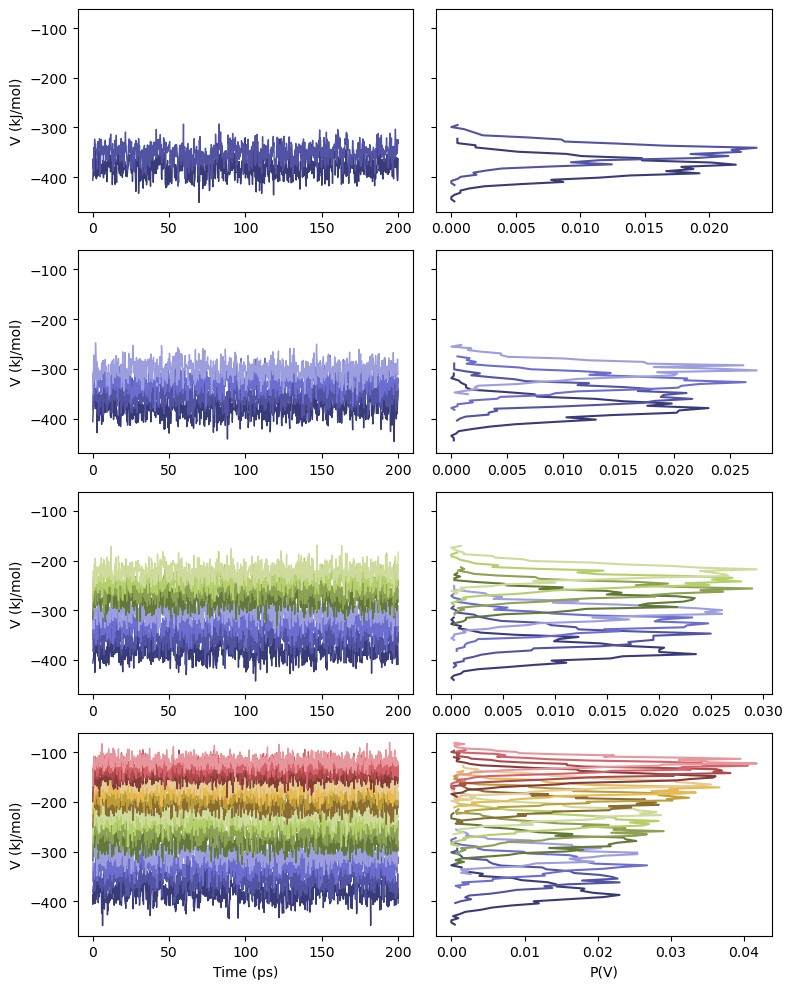

In [27]:
aver = []
fig, ax = plt.subplots(4,2, sharey=True, figsize=(8,10))
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab20b.colors)
nbins = 30
for i, nrep in enumerate(nreps):
    for j in range(nrep):
        file = "nrep%i/rep%i/potential_rerun.xvg"%(nrep,j)
        data = np.loadtxt(file, comments=["#", "@"])
        Erest = data[:,1] + data[:,3] + data[:,4] + data[:,5] + data[:,6]
        ax[i][0].plot(data[:,0], Erest, lw=1, label='$\lambda=$%g'%lmbd[i][j])
        aver.append(np.mean(data[:,1]))
        
        hist, edges = np.histogram(Erest[20:], bins=nbins, density=True)
        centers = [np.mean(edges[i:i+2]) for i in range(nbins)]
        ax[i][1].plot(hist, centers)

[ax[i][0].set_ylabel('V (kJ/mol)') for i in range(4)]
#ax[0].set_xlim(0, data[-1,0])
ax[-1,0].set_xlabel('Time (ps)')
ax[-1,1].set_xlabel('P(V)')
plt.tight_layout()


/tmp/ipykernel_2892159/1711940333.py:19: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


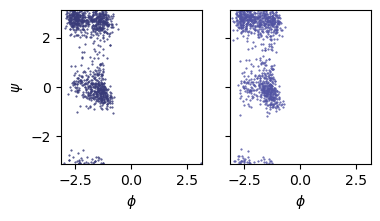

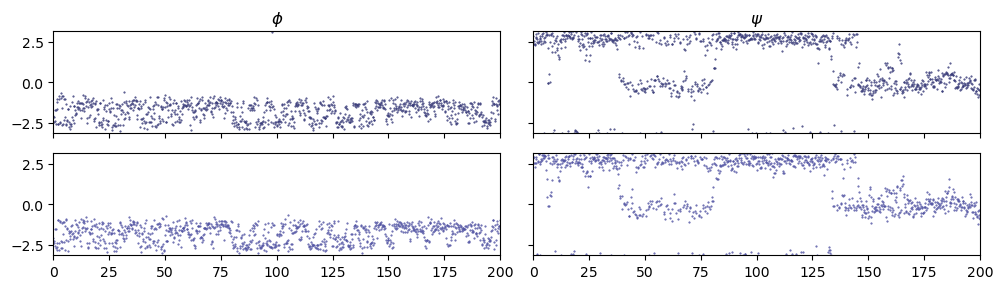

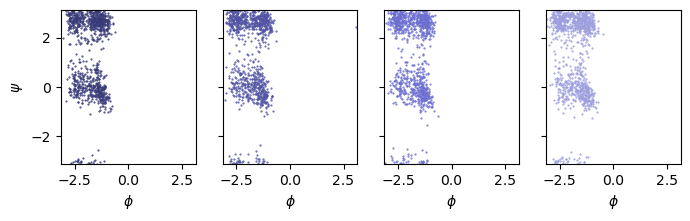

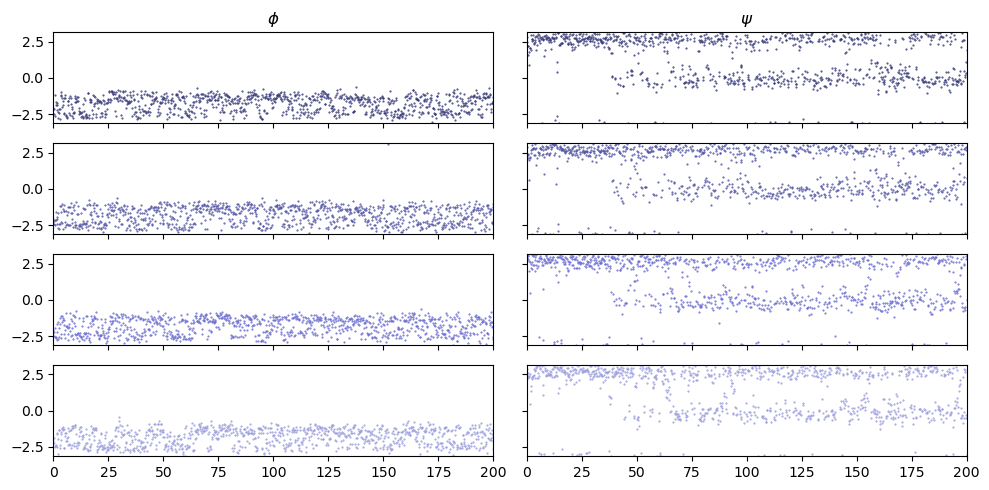

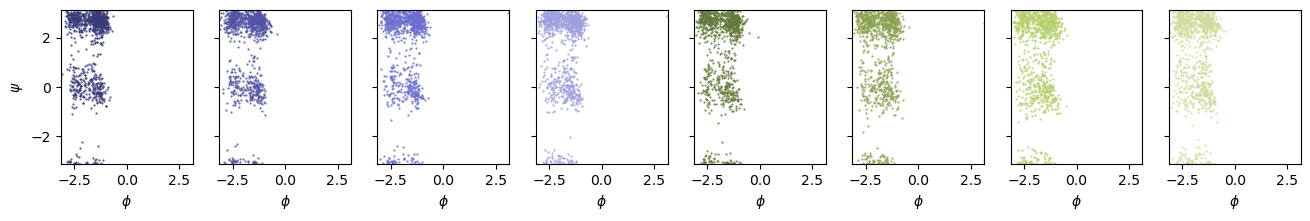

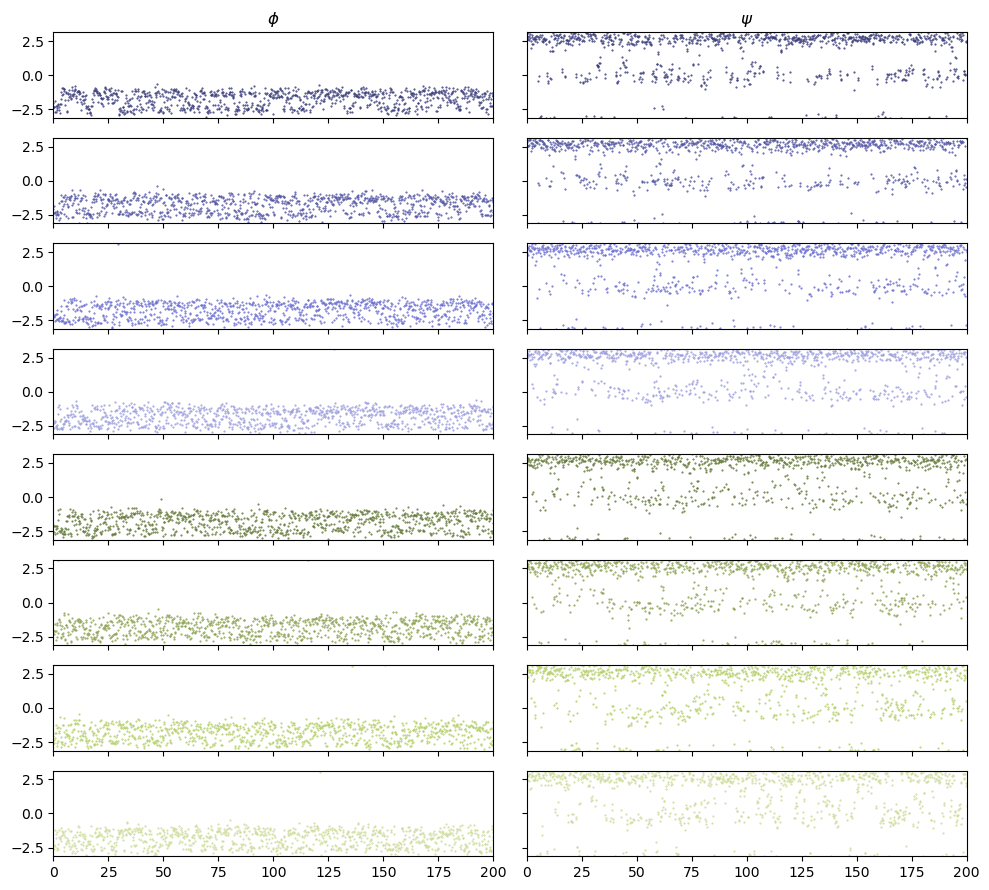

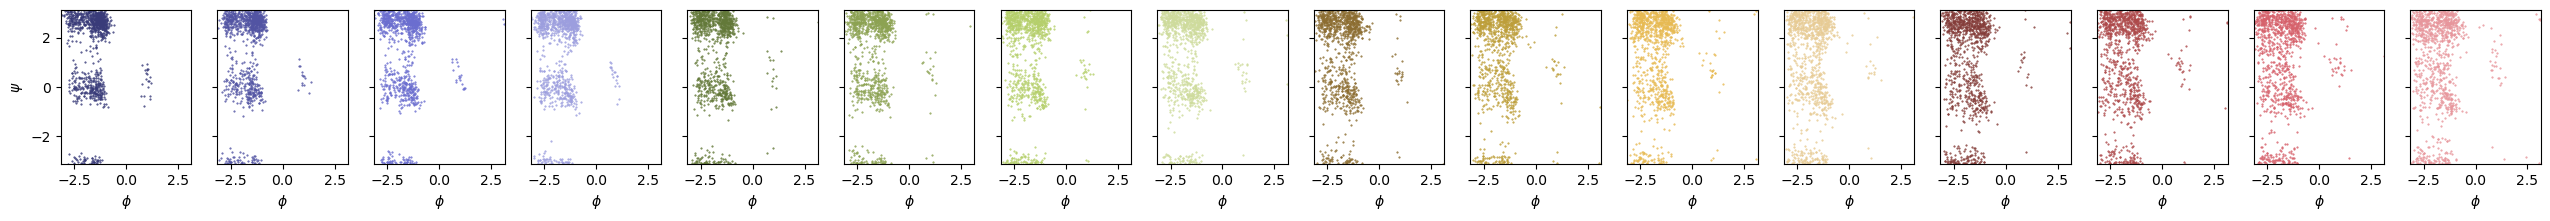

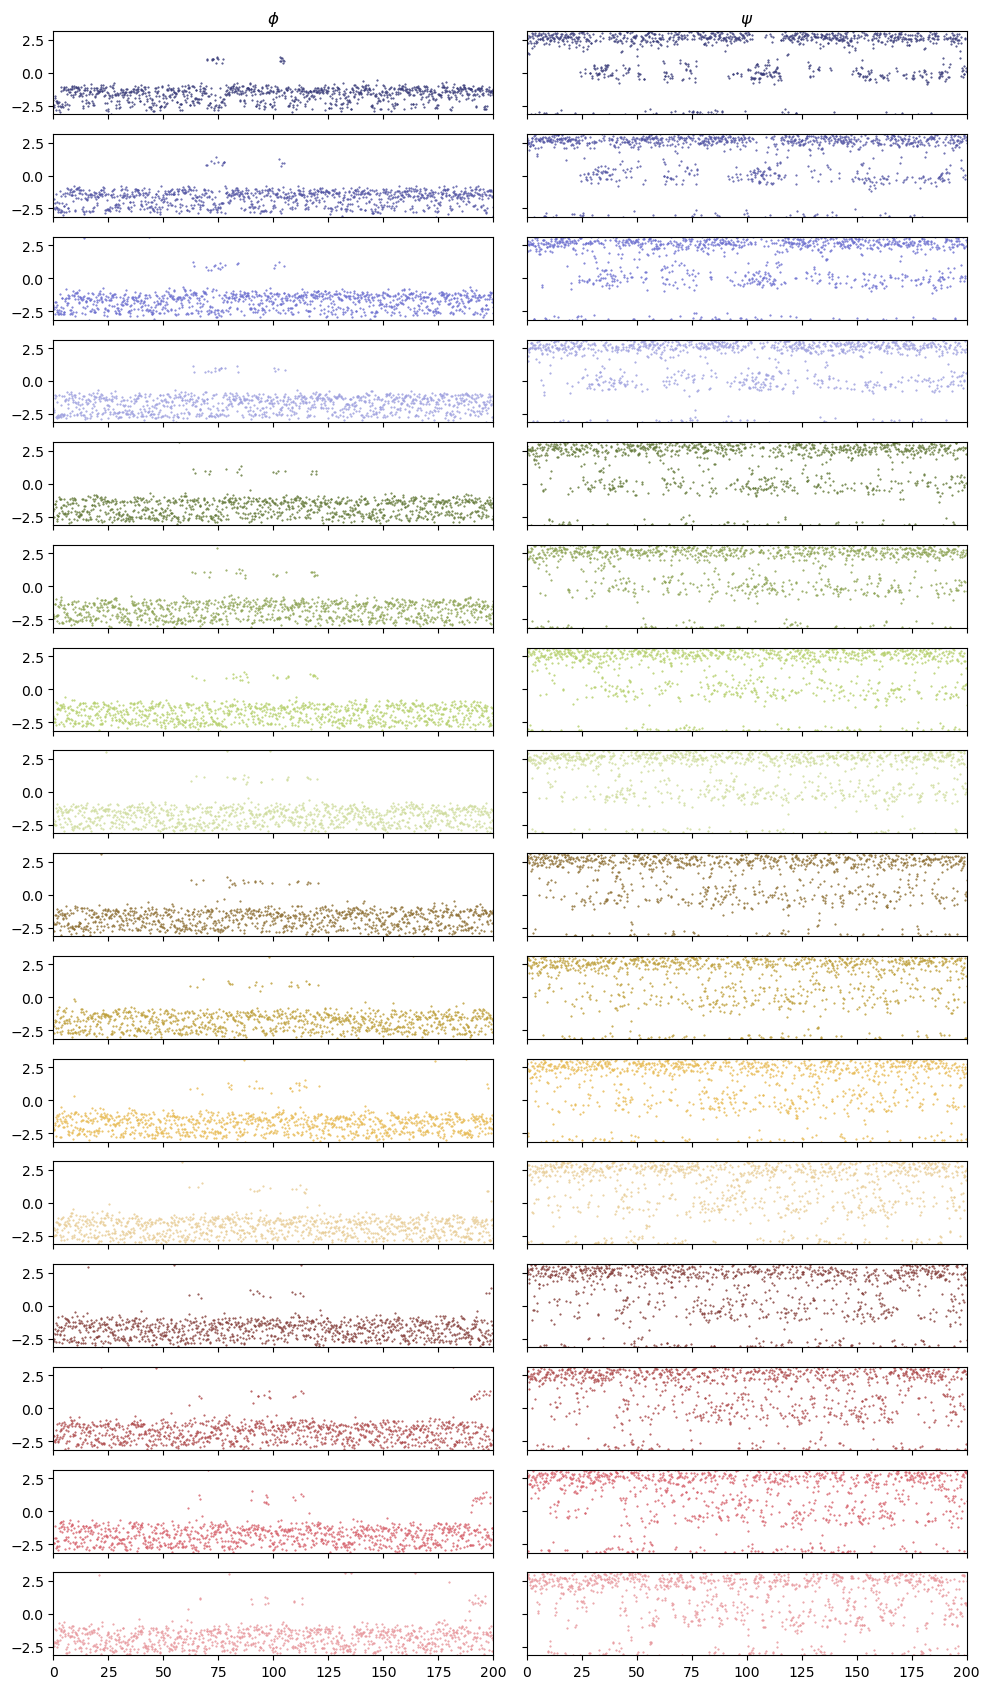

In [33]:
for j,nrep in enumerate(nreps):
    fig0, ax0 = plt.subplots(1,nrep, figsize=(nrep*2,2), sharex=True, sharey=True)
    fig, ax = plt.subplots(nrep,2, figsize=(10,nrep+1), sharex=True, sharey=True)
    for i in range(nrep):
        traj = md.load_xtc("nrep%i/rep%i/traj_comp.xtc"%(nrep,i), top="../alaTB_ff03_tip3p_npt.gro")
        dih, phi = md.compute_phi(traj)
        dih, psi = md.compute_psi(traj)
        ax[i][0].plot(traj.time, phi.ravel(), '.', ms=1, color='C%i'%i)
        ax[i][1].plot(traj.time, psi.ravel(), '.', ms=1, color='C%i'%i)
        ax0[i].plot(phi.ravel(),psi.ravel(), '.', ms=1, color='C%i'%i)
        ax0[i].set_xlabel('$\phi$')
    
    ax0[0].set_xlim(-np.pi, np.pi); ax0[0].set_ylim(-np.pi, np.pi) 
    ax0[0].set_ylabel('$\psi$')
    plt.tight_layout()
    
    ax[0][0].set_ylim(-np.pi, np.pi)
    ax[0][0].set_title('$\phi$')
    ax[0][1].set_title('$\psi$')
    ax[0][0].set_xlim(0,traj.time[-1])
    plt.tight_layout()